#Exercise 1: Setting Up the Environment

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00


#Exercise 2: Define the Bayesian Network Structure


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

def define_network_structure():
    model = BayesianNetwork([
        ('Age', 'HeartDisease'),
        ('Smoking', 'HeartDisease'),
        ('Exercise', 'HeartDisease'),
        ('Cholesterol', 'HeartDisease'),
        ('BloodPressure', 'HeartDisease'),
        ('HeartDisease', 'ChestPain'),
        ('HeartDisease', 'ECGResult')
    ])
    return model

#Exercise 3: Define Conditional Probability Tables (CPTs)

In [3]:
def define_cpts(model):
    cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.5], [0.2]])
    cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.6], [0.4]])
    cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])
    cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.8], [0.2]])
    cpd_bp = TabularCPD(variable='BloodPressure', variable_card=2, values=[[0.75], [0.25]])

    cpd_hd = TabularCPD(
        variable='HeartDisease', variable_card=2,
        values=[
            [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,
             0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3,
             0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
            [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
             0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
             0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]],
        evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure'],
        evidence_card=[3, 2, 2, 2, 2]
    )

    cpd_cp = TabularCPD(
        variable='ChestPain', variable_card=2,
        values=[[0.7, 0.3], [0.3, 0.7]],
        evidence=['HeartDisease'], evidence_card=[2]
    )
    cpd_ecg = TabularCPD(
        variable='ECGResult', variable_card=2,
        values=[[0.8, 0.2], [0.2, 0.8]],
        evidence=['HeartDisease'], evidence_card=[2]
    )

    model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bp, cpd_hd, cpd_cp, cpd_ecg)
    return model


#Exercise 4: Inference in the Bayesian Network

In [4]:
def perform_inference(model):
    infer = VariableElimination(model)
    query_hd = infer.query(variables=['HeartDisease'], evidence={'Age': 1, 'Smoking': 1, 'Cholesterol': 0, 'BloodPressure': 0})
    query_ecg = infer.query(variables=['ECGResult'], evidence={'ChestPain': 1})
    query_no_exercise = infer.query(variables=['HeartDisease'], evidence={'Exercise': 1})

    return query_hd, query_ecg, query_no_exercise

#Exercise 5: Parameter Learning from Simulated Data

In [6]:
def simulate_data():
    data = pd.DataFrame(np.random.randint(0, 2, size=(1000, 8)), columns=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure', 'HeartDisease', 'ChestPain', 'ECGResult'])
    return data

def learn_parameters(model, data):
    from pgmpy.estimators import MaximumLikelihoodEstimator
    model.fit(data, estimator=MaximumLikelihoodEstimator)
    return model

#Exercise 6: Network Visualization and Analysis

In [7]:
def visualize_network(model):
    G = nx.DiGraph()
    G.add_edges_from(model.edges())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, node_color='lightblue', font_weight='bold', arrows=True)
    plt.show()

def sensitivity_analysis(model, infer):
    smoking_on_hd = infer.query(variables=['HeartDisease'], evidence={'Smoking': 1})
    non_smoking_on_hd = infer.query(variables=['HeartDisease'], evidence={'Smoking': 0})

    return smoking_on_hd, non_smoking_on_hd

#Results

Probability of Heart Disease (Middle-aged, Smoker, High Cholesterol, High BP):
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.2500 |
+-----------------+---------------------+
| HeartDisease(1) |              0.7500 |
+-----------------+---------------------+

Probability of Abnormal ECG given Chest Pain:
+--------------+------------------+
| ECGResult    |   phi(ECGResult) |
+==============+==================+
| ECGResult(0) |           0.4281 |
+--------------+------------------+
| ECGResult(1) |           0.5719 |
+--------------+------------------+

Probability of Heart Disease in Non-Exercising Patients:
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.4284 |
+-----------------+---------------------+
| HeartDisease(1) |              0.5716 |
+-----------------

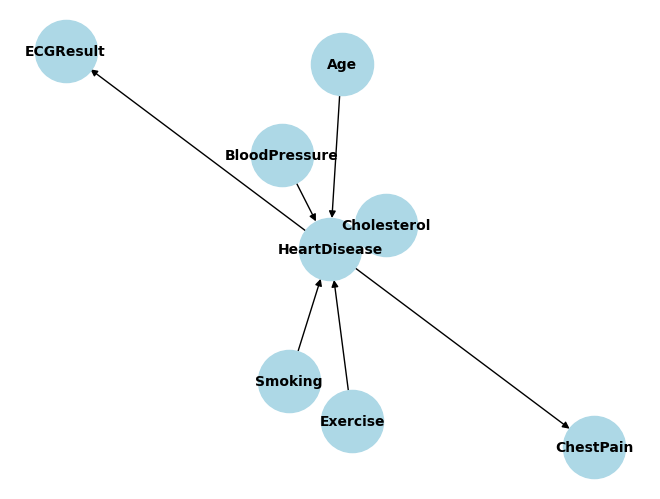


Probability of Heart Disease (Smoker):
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.5318 |
+-----------------+---------------------+
| HeartDisease(1) |              0.4682 |
+-----------------+---------------------+

Probability of Heart Disease (Non-Smoker):
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.5151 |
+-----------------+---------------------+
| HeartDisease(1) |              0.4849 |
+-----------------+---------------------+


In [8]:
def main():
    model = define_network_structure()
    model = define_cpts(model)

    query_hd, query_ecg, query_no_exercise = perform_inference(model)

    print("Probability of Heart Disease (Middle-aged, Smoker, High Cholesterol, High BP):")
    print(query_hd)

    print("\nProbability of Abnormal ECG given Chest Pain:")
    print(query_ecg)

    print("\nProbability of Heart Disease in Non-Exercising Patients:")
    print(query_no_exercise)

    data = simulate_data()
    model = learn_parameters(model, data)

    print("\nModel parameters learned from simulated data:")
    for cpd in model.get_cpds():
        print(cpd)

    visualize_network(model)

    infer = VariableElimination(model)
    smoking_on_hd, non_smoking_on_hd = sensitivity_analysis(model, infer)

    print("\nProbability of Heart Disease (Smoker):")
    print(smoking_on_hd)

    print("\nProbability of Heart Disease (Non-Smoker):")
    print(non_smoking_on_hd)

main()